In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")


In [59]:
# setting output rows and columns to prevent output getting truncated
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [60]:
# Importing Data
df = pd.read_csv("Bankruptcy Prediction.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [61]:
# Checking type of data
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [62]:
# Checking column names
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [63]:
# Renaming Column name
df = df.rename(columns={'Bankrupt?':'Bankrupt'})

In [64]:
# Rechecking column names
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.00688

In [65]:
#  Checking for null values in df
df.isnull().sum()


Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [66]:
# Checking for duplicates in df
df[df.duplicated()]

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [67]:
# Rechecking for duplicates
df.loc[df.duplicated()]

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [68]:
# Checking for NAN values in df
df.isna().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

## EDA

In [69]:
# Computing the descriptive statistics of our features
df.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Through df.info(), we observed that we have a majority of "float64" data. The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [71]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt', ' Liability-Assets Flag', ' Net Income Flag']

There are only three categorical data columns, we will first explore these columns

In [72]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

In [73]:
print('Solvent companies:',round(df['Bankrupt'].value_counts()[0]/len(df)*100,2),'% of dataset')
print('Bankrupt companies:',round(df['Bankrupt'].value_counts()[1]/len(df)*100,2),'% of dataset')

Solvent companies: 96.77 % of dataset
Bankrupt companies: 3.23 % of dataset


As above we can see data is highly skewed as 96% of the companies are solvent in the dataset

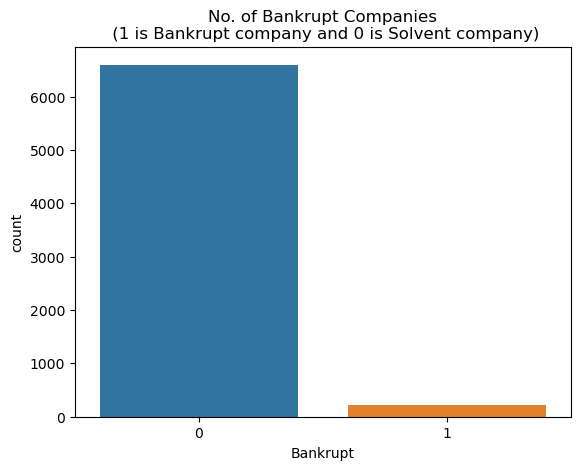

In [74]:
sns.countplot(x=df['Bankrupt'])
plt.title('No. of Bankrupt Companies\n (1 is Bankrupt company and 0 is Solvent company)')
plt.show()

Looking at the plot above we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

In [75]:
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [76]:
print('Assets more than Liabilites:',round(df[' Liability-Assets Flag'].value_counts()[0]/len(df)*100,2),'% of dataset')
print('Liabilities more than Assets :',round(df[' Liability-Assets Flag'].value_counts()[1]/len(df)*100,2),'% of dataset')

Assets more than Liabilites: 99.88 % of dataset
Liabilities more than Assets : 0.12 % of dataset


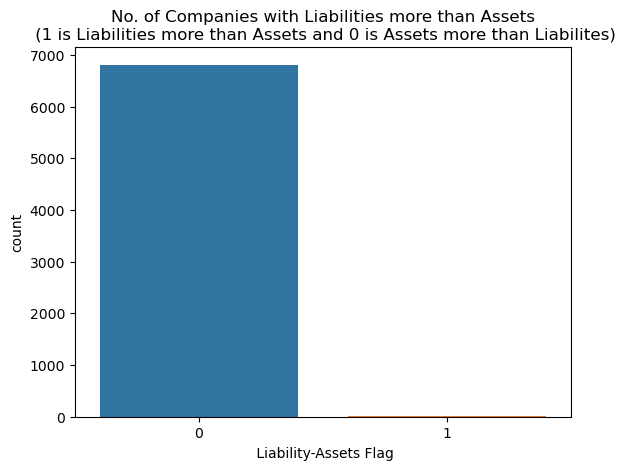

In [77]:
sns.countplot(x=df[' Liability-Assets Flag'])
plt.title('No. of Companies with Liabilities more than Assets\n (1 is Liabilities more than Assets and 0 is Assets more than Liabilites)')
plt.show()

The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

In [78]:
df[[' Liability-Assets Flag','Bankrupt']].value_counts()

 Liability-Assets Flag  Bankrupt
0                       0           6597
                        1            214
1                       1              6
                        0              2
dtype: int64

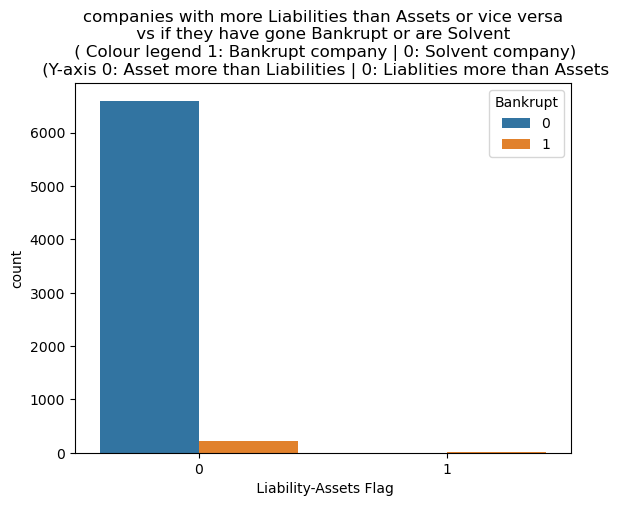

In [79]:
sns.countplot(x=df[' Liability-Assets Flag'],hue=df['Bankrupt'])
plt.title('companies with more Liabilities than Assets or vice versa\n vs if they have gone Bankrupt or are Solvent \n ( Colour legend 1: Bankrupt company | 0: Solvent company)\n (Y-axis 0: Asset more than Liabilities | 0: Liablities more than Assets')
plt.show()

A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.


In [80]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [81]:
print('Net Income is Negative for the last two years:',round(df[' Net Income Flag'].value_counts()[1]/len(df)*100,2),'% of dataset')

Net Income is Negative for the last two years: 100.0 % of dataset


The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

In [82]:
df[[' Net Income Flag','Bankrupt']].value_counts()

 Net Income Flag  Bankrupt
1                 0           6599
                  1            220
dtype: int64

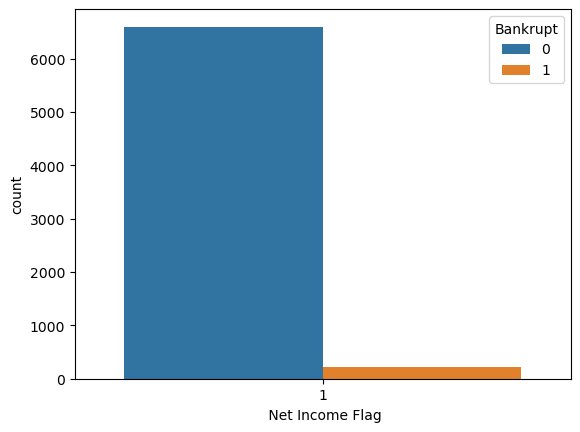

In [83]:
sns.countplot(x=df[' Net Income Flag'],hue=df['Bankrupt'])
plt.show()

Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.

In [84]:
positive_corr = df[numeric_features].corrwith(df["Bankrupt"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["Bankrupt"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["Bankrupt"]].copy()
negative_corr = df[negative_corr + ["Bankrupt"]].copy()

In [85]:
def corrbargraph(x_value, y_value):
    
        
    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df)

    plt.tight_layout(pad=0.5)

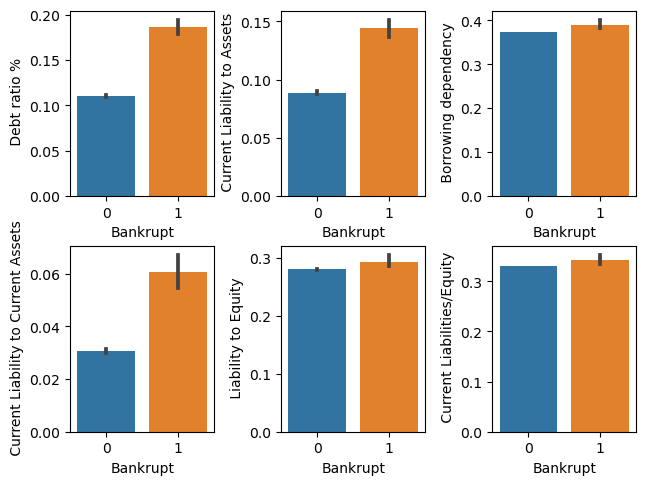

In [86]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.


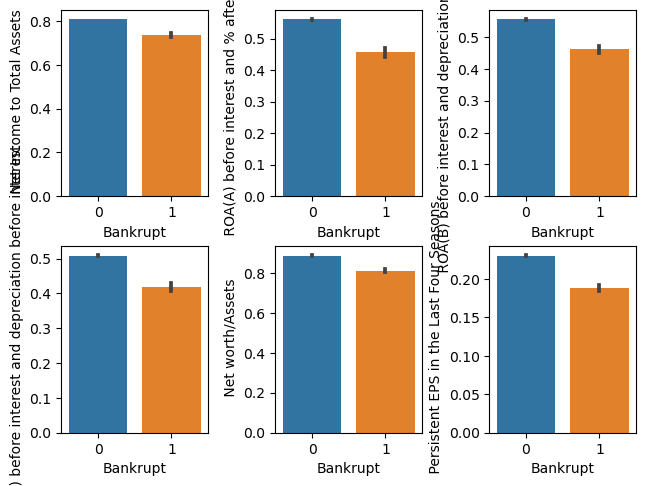

In [87]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.
Let us check the relation of top six positive and negative correlation attributes among eachother

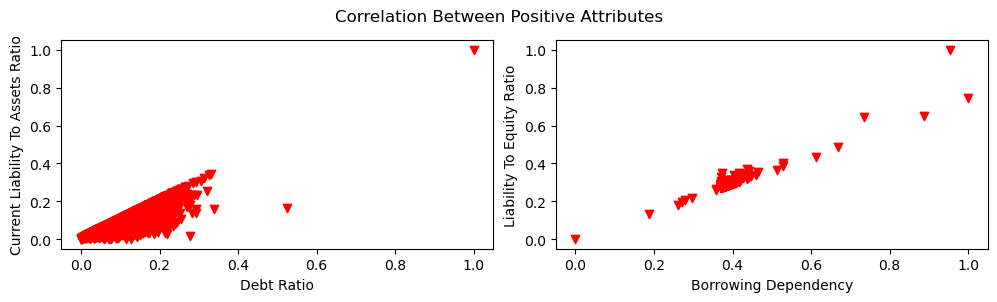

In [88]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(df[' Debt ratio %'],df[' Current Liability to Assets'], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(df[' Borrowing dependency'],df[' Liability to Equity'], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a high correlation with the target attribute.

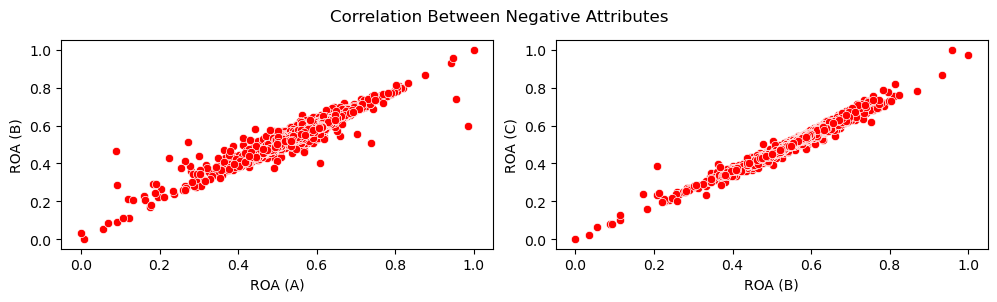

In [89]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=df, x=' ROA(A) before interest and % after tax', y=' ROA(B) before interest and depreciation after tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=df, x=' ROA(B) before interest and depreciation after tax', y=' ROA(C) before interest and depreciation before interest',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a high correlation with the target attribute.

<Axes: >

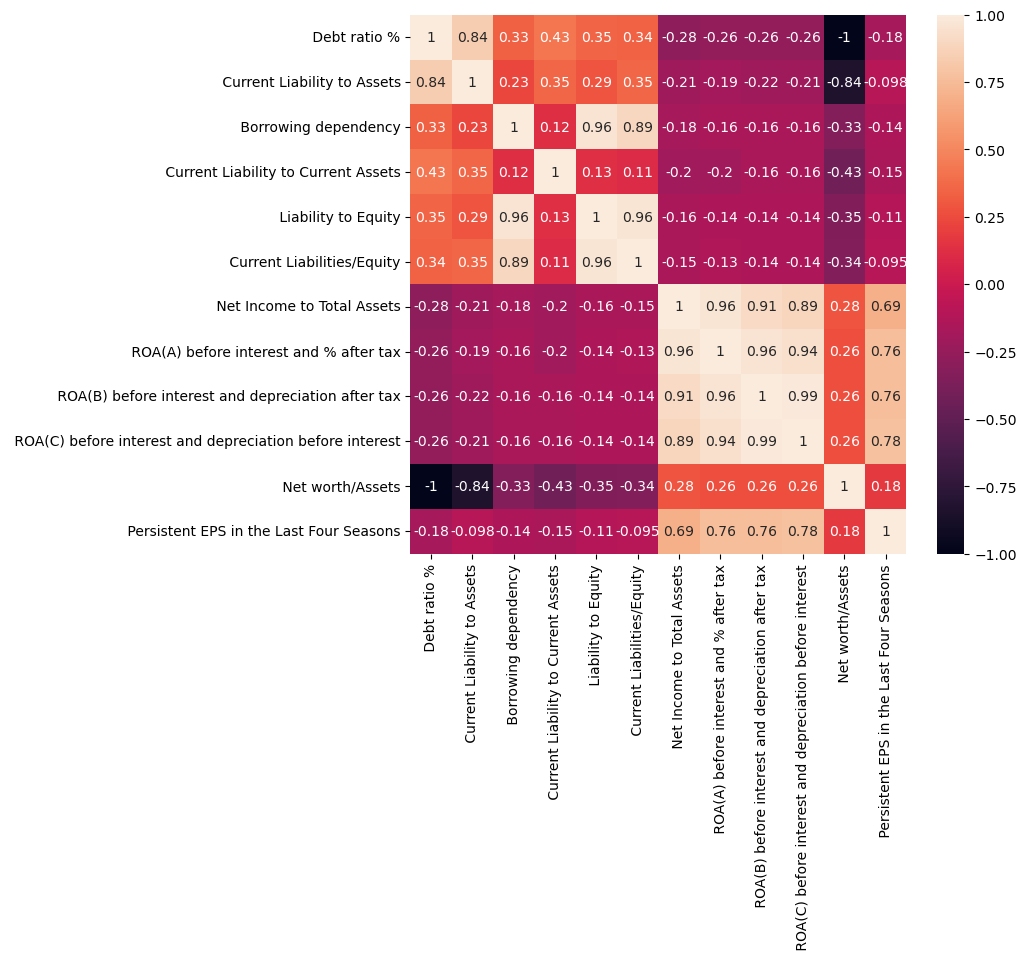

In [90]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)

A total correlation of the top 12 attributes are given above


## Summary of Analysis
- The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.
- Several companies possess many assets, which is always a good sign for an organization.
- An organization cannot guarantee not being bankrupt, although owning several assets.
- The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.
- Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.
- It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.
- An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
- An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.
- There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
- We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.

## Data Modeling


In [91]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
df[numeric_features] = df[numeric_features].fillna(0)


The numeric attributes have been normalized.


Our dataset is highly imbalanced. Thus before training the model, we need to deal with this data. Let us lay down some steps we must follow when we come across an imbalanced dataset.

- Split the dataset into training and testing sets (80% - 20%).We preserve the 20% testing set for the final evaluation.
- Through "Stratified K Fold Cross-Validation" we will now distribute the 80% training set into further training and testing splits.
- Since we are dealing with over 50 features, we use "Randomized Search Cross-Validation" as this technique proves to perform better with many features.

In [92]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = df.drop('Bankrupt', axis=1)
    y = df['Bankrupt']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [93]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), df,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.67      0.94      0.78        51

    accuracy                           0.98      1364
   macro avg       0.83      0.96      0.89      1364
weighted avg       0.99      0.98      0.98      1364



In [94]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), df, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1313
           1       0.24      0.82      0.37        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



In [95]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), df, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1313
           1       0.20      0.94      0.32        51

    accuracy                           0.85      1364
   macro avg       0.60      0.90      0.62      1364
weighted avg       0.97      0.85      0.90      1364



In [97]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), df, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.81      0.94      0.87        51

    accuracy                           0.99      1364
   macro avg       0.91      0.97      0.93      1364
weighted avg       0.99      0.99      0.99      1364



In [98]:
Models.sort_values('F1 score',ascending=False)


,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
3,Random Forest Classifier,98.97%,0.81,0.94,0.87,0.97
0,K Nearest Neighbour,98.02%,0.67,0.94,0.78,0.96
1,Logistic Regression,89.37%,0.24,0.82,0.37,0.86
2,DecisionTree Classifier,85.26%,0.20,0.94,0.32,0.90


We see that among all the models "Random Forest Classifier and K Nearest Neighbour" have the highest F-1 Score. Thus, we may use these models to train our data.

"SelectKBest" is used to select features that add the most value to the target variable

In [99]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_with_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = df.drop('Bankrupt', axis=1)
    y = df['Bankrupt']
    
    '''
    Feature Selection Process: 
    class sklearn.feature_selection.SelectKBest(score_func=<function>, k=<number of features>
        score_func - Scoring measure
        k - Total features to be returned 
    '''
    
    fs = SelectKBest(score_func=f_classif, k=int((df.shape[1]*85)/100))

    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [100]:
print("Random Forest Classifier")
TrainedModel = taining_with_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), df, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1313
           1       0.47      0.96      0.63        51

    accuracy                           0.96      1364
   macro avg       0.73      0.96      0.80      1364
weighted avg       0.98      0.96      0.96      1364



In [101]:
print("K Nearest Neighbour")
TrainedModel = taining_with_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), df,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.64      0.94      0.76        51

    accuracy                           0.98      1364
   macro avg       0.82      0.96      0.88      1364
weighted avg       0.98      0.98      0.98      1364



In [102]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
1,K Nearest Neighbour,97.8%,0.64,0.94,0.76,0.96
0,Random Forest Classifier,95.75%,0.47,0.96,0.63,0.96


In [103]:
df

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,-0.031279,-0.616288,-0.750658,-0.545216,-0.151910,-0.829327,-1.279154,-1.275135,-1.276053,-1.793974,-0.671032,-0.025696,-0.471337,-1.375049,-0.025298,0.019995,-0.012030,-0.012261,-0.010298,-0.182246,-0.01372,-0.119110,-0.769240,-0.01211,-0.034234,-0.092514,-0.026224,1.750717,-1.750717,-0.133495,0.959714,0.041862,-0.471240,-1.460387,-0.332003,-0.540305,-0.045963,-0.03833,-0.661677,-0.407093,-0.155174,-0.017023,-0.237106,-0.038219,-2.393554,-1.155748,-1.520461,-0.861757,-0.020935,-0.072813,1.126184,-0.563710,-0.045368,-0.095879,-0.412865,-1.245242,0.568445,-0.094973,-1.232503,-0.043607,1.313931,-0.175409,1.299655,-0.019618,-0.685347,0.003947,-0.01211,-0.412865,0.568445,0.558387,-0.257012,-0.108210,-1.247139,-0.206579,2.812287,0,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,1,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,0.009823,-0.616288,-0.750658,-0.326608,-0.151910,-0.829327,-0.251859,-0.250410,-0.251531,-0.597335,-0.303511,-0.025696,-0.550018,-0.435280,-0.027128,0.010034,0.039470,0.039661,-0.001930,0.207716,-0.01372,0.027845,-0.143106,-0.01211,-0.034234,0.372066,-0.026224,1.075648,-1.075648,-0.132272,0.129295,-0.010932,-0.548322,-0.446

In [104]:
X = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

In [105]:
fs = SelectKBest(score_func=f_classif, k=int((df.shape[1]*11)/100))


In [106]:
int(df.shape[1]*11/100)

10

In [107]:
fs.fit(X,y)

SelectKBest()

In [108]:
selected_column_indices=fs.get_support(indices=True)
selected_column_indices

array([ 0,  1,  2, 18, 22, 36, 37, 42, 67, 85], dtype=int64)

In [109]:
features_new = df.iloc[:,selected_column_indices]
features_new

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Net Value Per Share (C),Operating Profit Per Share (Yuan ¥),Total debt/Total net worth,Debt ratio %,Operating profit/Paid-in capital,Long-term Liability to Current Assets,Liability-Assets Flag
0,1,-2.217747,-2.045648,-1.276053,-0.471337,-0.026224,1.750717,-0.471240,-0.094973,0
1,1,-0.673779,-0.311045,-0.251531,-0.550018,-0.026224,1.075648,-0.548322,-0.094973,0
2,1,-1.303576,-0.908353,0.090815,-0.599557,-0.026224,1.749595,-0.599611,-0.094973,0
3,1,-1.735759,-1.636089,-1.089776,-1.121182,-0.026224,0.710079,-1.124820,-0.094973,0
4,1,-0.661729,-0.307722,-0.692051,-0.436368,-0.026224,-0.123665,-0.433725,-0.094973,0
...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189381,-0.291938,-0.466756,-0.389742,-0.026224,0.212188,-0.387125,-0.094973,0
6815,0,-0.494640,-0.310214,-0.279221,-0.375171,-0.026224,-0.258230,-0.374522,-0.094973,0
6816,0,-0.534806,-0.379166,2.355083,-0.322718,-0.026224,-1.376803,-0.319422,-0.094973,0
6817,0,0.017874,0.019593,0.678593,0.096913,-0.026224,-0.485869,0.098810,5.516398,0


In [110]:
X = fs.fit_transform(X,y)

In [111]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [112]:
X

,0,1,2,3,4,5,6,7,8,9
0,-2.217747,-2.045648,-2.400185,-1.793974,-1.375049,1.750717,-1.750717,-1.460387,-1.232503,-2.254152
1,-0.673779,-0.311045,-0.598406,-0.597335,-0.435280,1.075648,-1.075648,-0.446760,-0.143464,-0.309011
2,-1.303576,-0.908353,-1.319813,-1.450047,-1.252471,1.749595,-1.749595,-1.126513,-0.971256,-0.820449
3,-1.735759,-1.636089,-1.556226,-1.054957,-1.077683,0.710079,-0.710079,-1.141945,-1.088654,-1.691098
4,-0.661729,-0.307722,-0.508013,-0.489325,-0.480679,-0.123665,0.123665,-0.495506,-0.816867,-0.315984
...,...,...,...,...,...,...,...,...,...,...
6814,-0.189381,-0.291938,-0.168169,-0.367103,-0.369451,0.212188,-0.212188,-0.376948,-0.356818,-0.194217
6815,-0.494640,-0.310214,-0.477592,-0.364260,-0.349021,-0.258230,0.258230,-0.354412,-0.082282,-0.198645
6816,-0.534806,-0.379166,-0.534957,-0.537645,-0.335401,-1.376803,1.376803,-0.338735,-0.106881,-0.247498
6817,0.017874,0.019593,0.007402,-0.014648,0.036875,-0.485869,0.485869,-0.007065,0.190889,0.100359


In [113]:
y

,Bankrupt
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


In [114]:
x_features=X.index



In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
x_train

,0,1,2,3,4,5,6,7,8,9
3759,-0.109853,-0.240431,-0.145571,-0.233511,-0.253682,0.868193,-0.868193,-0.253490,0.210423,-0.159853
1782,0.023497,0.056146,0.085627,-0.148240,-0.212822,0.460012,-0.460012,-0.207928,0.124723,0.078185
5013,0.059646,0.036208,0.017832,-0.006121,-0.017605,-0.395038,0.395038,0.003224,0.360053,0.049098
5412,-0.085754,0.059469,-0.110804,0.064938,0.066385,1.454112,-1.454112,0.092877,0.051530,0.057577
3066,-0.449654,-0.166495,-0.396760,-0.247723,-0.185583,0.778483,-0.778483,-0.177309,0.054818,-0.077415
...,...,...,...,...,...,...,...,...,...,...
3772,0.618752,0.647639,0.487181,1.190518,1.217261,-1.130100,1.130100,1.327700,0.954578,0.712683
5191,0.752905,0.937570,0.928717,0.985867,0.808666,-0.660804,0.660804,0.789042,0.744309,0.890588
5226,0.034743,0.054484,0.055206,-0.145397,-0.196933,0.242465,-0.242465,-0.189312,-0.027419,0.132298
5390,1.254976,1.307253,1.300720,1.068296,1.003884,-0.871623,0.871623,0.980597,1.175075,1.188908


In [117]:
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

In [118]:
x_train

array([[-0.10985293, -0.24043143, -0.14557081, ..., -0.25349011,
         0.21042342, -0.15985328],
       [ 0.02349705,  0.05614575,  0.0856271 , ..., -0.20792833,
         0.12472278,  0.07818459],
       [ 0.05964615,  0.03620779,  0.01783223, ...,  0.0032236 ,
         0.36005305,  0.0490978 ],
       ...,
       [ 0.03474344,  0.05448425,  0.05520632, ..., -0.18931166,
        -0.0274193 ,  0.13229772],
       [ 1.25497616,  1.30725289,  1.30071986, ...,  0.9805974 ,
         1.17507457,  1.18890797],
       [ 1.20918732,  1.05387462,  0.92089472, ...,  1.95454181,
         1.35785772,  1.04101945]])

In [119]:
sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [120]:
    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values

In [121]:
rand_model = RandomizedSearchCV(RandomForestClassifier(),{"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},n_iter=4)

In [122]:
 for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

In [123]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)

In [124]:
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

In [125]:
y_pred_df = pd.DataFrame({'Actual':np.array(y_test).reshape(-1),
              'Prediction':final_model_sm.predict(x_test)})

In [126]:
Result=[]
for i in range(len(y_pred_df)):
    if (y_pred_df.loc[i,'Actual']==1) & (y_pred_df.loc[i,'Prediction']==1):
      Result.append('True Positive')
    elif (y_pred_df.loc[i,'Actual']==0) & (y_pred_df.loc[i,'Prediction']==0):
      Result.append('True Negative')
    elif (y_pred_df.loc[i,'Actual']==1) & (y_pred_df.loc[i,'Prediction']==0):
      Result.append('False Negative')
    elif (y_pred_df.loc[i,'Actual']==0) & (y_pred_df.loc[i,'Prediction']==1):
      Result.append('False Positive')
    else:
      Result.append('Invalid')

y_pred_df['Result']=pd.Series(Result)
y_pred_df[0:30]

#y_pred_df.drop('index',axis=1,inplace=True)
y_pred_df

,Actual,Prediction,Result
0,0,0,True Negative
1,0,0,True Negative
2,0,0,True Negative
3,1,0,False Negative
4,0,0,True Negative
...,...,...,...
1359,0,0,True Negative
1360,0,0,True Negative
1361,0,0,True Negative
1362,0,0,True Negative


In [127]:
y_pred_df['Result'].value_counts()

True Negative     1295
True Positive       47
False Positive      18
False Negative       4
Name: Result, dtype: int64

In [128]:
y_pred_df[y_pred_df['Actual']!=y_pred_df['Prediction']]

,Actual,Prediction,Result
3,1,0,False Negative
29,1,0,False Negative
41,0,1,False Positive
124,0,1,False Positive
131,0,1,False Positive
134,0,1,False Positive
154,0,1,False Positive
230,0,1,False Positive
271,1,0,False Negative
312,0,1,False Positive


In [129]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
np.array(y_test).reshape(-1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.72      0.92      0.81        51

    accuracy                           0.98      1364
   macro avg       0.86      0.95      0.90      1364
weighted avg       0.99      0.98      0.98      1364



In [132]:
final_model_sm

RandomForestClassifier(n_estimators=300)

In [133]:
# Saving the model

In [134]:
import pickle

In [135]:
filename = 'trained_model.sav'
pickle.dump(final_model_sm,open(filename,'wb'))

In [136]:
# Loading the model

In [137]:
load_model=pickle.load(open('trained_model.sav','rb'))

In [138]:
t=pd.DataFrame(x_test)
t['Actual']= y_test
t['Predict']= final_model_sm.predict(x_test)
t['Result']=pd.Series(Result)
t

,0,1,2,3,4,5,6,7,8,9,Actual,Predict,Result
0,-1.165406,-1.179177,-0.890445,-0.790616,-0.825715,-1.286532,1.286532,-0.868084,-0.491718,-1.051873,0,0,True Negative
1,0.615539,0.194881,0.601911,0.099047,0.125404,0.311990,-0.311990,0.158281,0.461342,0.248863,0,0,True Negative
2,1.313618,1.109535,1.030410,0.457186,0.540809,-0.640619,0.640619,0.605815,0.557503,0.985747,0,0,True Negative
3,-1.124437,-1.031304,-1.155541,-1.188549,-0.980074,2.116846,-2.116846,-1.036124,-0.566248,-0.994496,1,0,False Negative
4,0.028317,0.105160,0.132562,-0.028860,-0.060734,1.289270,-1.289270,-0.043073,0.032547,0.065314,0,0,True Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,-0.052014,0.091037,-0.089075,0.016618,0.091354,0.064727,-0.064727,0.120313,0.711380,0.103930,0,0,True Negative
1360,-0.138772,-0.026098,-0.073430,-0.239196,-0.283192,-1.373439,1.373439,-0.282640,0.078230,0.108701,0,0,True Negative
1361,-0.286582,-0.336798,-0.179468,-0.418265,-0.419390,1.219184,-1.219184,-0.429613,-0.122769,-0.276169,0,0,True Negative
1362,-0.924412,-0.672421,-0.872193,-0.753665,-0.728106,1.487754,-1.487754,-0.763488,-0.198009,-0.495927,0,0,True Negative


In [139]:
t[t['Result']=='True Positive']

,0,1,2,3,4,5,6,7,8,9,Actual,Predict,Result
37,-0.577381,-0.582700,-0.512358,-0.631443,-0.582828,0.906320,-0.906320,-0.594714,-0.977438,-0.573023,1,1,True Positive
65,-1.525291,-2.078878,-1.624021,-0.952632,-1.095842,0.659056,-0.659056,-1.161051,-4.152998,-3.211278,1,1,True Positive
67,-0.230350,-0.252062,-0.064738,-0.389842,-0.414850,0.629901,-0.629901,-0.427654,-0.161719,-0.214134,1,1,True Positive
68,-0.632007,-0.301076,-0.553209,-0.546172,-0.487489,1.604377,-1.604377,-0.503100,-0.162680,-0.343031,1,1,True Positive
104,-3.869359,-5.720879,-4.256722,-2.766066,-3.136549,2.334954,-2.334954,-3.360020,-3.800811,-7.550812,1,1,True Positive
105,-0.929232,-0.770449,-0.874800,-0.765035,-0.694057,2.272157,-2.272157,-0.727480,-1.383711,-0.716145,1,1,True Positive
110,-0.960562,-0.508763,-0.871324,-0.722399,-0.598718,1.154705,-1.154705,-0.624108,-0.250965,-0.496994,1,1,True Positive
120,-0.588628,-0.295261,-0.433264,-0.378472,-0.428470,0.350117,-0.350117,-0.440146,-0.122144,-0.199348,1,1,True Positive
125,-0.480984,-1.028812,-0.409797,-1.094750,-0.948294,1.599331,-1.599331,-1.002075,-0.360088,-0.990317,1,1,True Positive
144,-2.367163,-2.290719,-2.460157,-3.817744,-3.093420,1.532048,-1.532048,-3.315438,-0.877436,-2.185772,1,1,True Positive


In [140]:
t[(t['Result']=='False Positive') | (t['Result']=='False Negative')]

,0,1,2,3,4,5,6,7,8,9,Actual,Predict,Result
3,-1.124437,-1.031304,-1.155541,-1.188549,-0.980074,2.116846,-2.116846,-1.036124,-0.566248,-0.994496,1,0,False Negative
29,-1.396761,-1.018843,-1.388477,-1.012321,-0.743996,1.202363,-1.202363,-0.779900,-0.915037,-0.938864,1,0,False Negative
41,-2.062707,-2.246689,-2.229829,-1.290874,-1.182101,1.176572,-1.176572,-1.187262,-1.579872,-1.702091,0,1,False Positive
124,-0.893887,-0.891738,-0.949548,-0.969686,-0.862035,1.508499,-1.508499,-0.908012,-0.377878,-0.886256,0,1,False Positive
131,-1.077042,-1.154255,-1.130335,-0.850306,-0.784856,0.599063,-0.599063,-0.824482,-0.536636,-1.009353,0,1,False Positive
134,-0.794276,-0.861831,-0.806136,-0.992425,-0.698597,1.408136,-1.408136,-0.732134,-0.406317,-0.732939,0,1,False Positive
154,-1.173440,-1.008043,-1.188569,-0.898626,-0.807556,0.981452,-0.981452,-0.850447,-0.473100,-0.949078,0,1,False Positive
230,-3.565706,-3.508596,-3.823877,-2.703534,-2.208130,1.113214,-1.113214,-2.361825,-1.836907,-3.558361,0,1,False Positive
271,-0.526772,-0.218832,-0.407189,-0.412581,-0.353561,0.393851,-0.393851,-0.364700,0.146740,-0.152895,1,0,False Negative
312,-0.359683,-0.508763,-0.249001,-0.486482,-0.521539,1.253386,-1.253386,-0.538619,-0.606483,-0.409570,0,1,False Positive
